In [89]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
import numpy as np

In [48]:
# Initialize Data Directory

# Symbol
# Select folders by DOE > Today
# Get the latest data

## Plotting Arrangements

### General Structure

#### By Expiration ATM
- Option Type (P / C / P & C)
- Exact DOE / TTE Period (1M / 3M / 6M / 1Y / 1Y6M / 2Y / Max) / Full Normal Cycles (No weeklys) / Weeklys
- Metric: Nominal Price / OI / Vol / IV / delta / gamma / vega / theta / rho

#### By Strike Price (EXP)
- Option Type (P / C / P & C)
- Strike Range (numerical range, full)
- Exact DOE / TTE Period (1M / 3M / 6M / 1Y / 1Y6M / 2Y / Max) / Full Normal Cycles (No weeklys) / Weeklys
- Metric: Nominal Price / OI / Vol / IV / delta / gamma / vega / theta / rho


In [54]:
# Retrieve the Expiration arrays (X - axis)

# Process the files
# Locate the ticker folder


ticker = 'SPY'

# indir = '../Data/' + ticker + '/' + str(each) + '/'
        # if not os.path.exists(outdir):
            # os.makedirs(outdir)

# Traverse the expirations (past today -> locate latest file)

In [101]:
exprations = os.listdir(path='../Data/' + ticker)

# Filter dates past today:
# Check year - this year >= 0
# Check month - this month >= 0
# Check day - this day >= 0

valid_expirations = []
today_y = datetime.datetime.today().strftime('%y')
today_m = datetime.datetime.today().strftime('%m')
today_d = datetime.datetime.today().strftime('%d')

for each in exprations:

    # Add expirations in the current month past today
    if each not in valid_expirations and int(pd.to_datetime(each).strftime('%y')) == int(today_y) and int(pd.to_datetime(each).strftime('%m')) == int(today_m) and int(pd.to_datetime(each).strftime('%d')) >= int(today_d):
        valid_expirations.append(each)
    
    # Add current year and months beyond current
    if int(pd.to_datetime(each).strftime('%y')) == int(today_y) and int(pd.to_datetime(each).strftime('%m')) > int(today_m):
        valid_expirations.append(each)
        
    # Add the following years
    if each not in valid_expirations and int(pd.to_datetime(each).strftime('%y')) > int(today_y):
        valid_expirations.append(each)
    

In [103]:
valid_expirations_sorted = pd.to_datetime(valid_expirations).sort_values()
valid_expirations_sorted = valid_expirations_sorted.to_pydatetime()

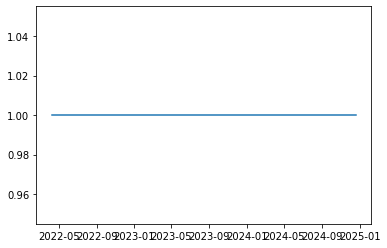

In [105]:
plt.plot(valid_expirations_sorted, np.ones(len(valid_expirations_sorted)))

In [215]:
for each in valid_expirations_sorted:
    print(each.month)

4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
6
6
7
8
9
9
12
12
1
3
3
6
12
1
12


In [323]:
# For each of the expiration dates selected in order:
# Retrive and plot the corresponding ATM metric
def plot_expiration_atm(o_type, doe_axis, metric):

    data_axis = dict()

    for each in doe_axis:

        indir = '../Data/' + ticker + '/' + str(each.year) + '-' + str(each.month) + '-' + str(each.day) + '/'
        list = os.listdir(path = indir)
        list_paths = [indir + filename for filename in list]

        newest = max(list_paths, key = os.path.getctime)

        # Read in the CSV for the corresponding DOE:
        data = pd.read_csv(newest, sep = ',')
        data = data[data.Type == o_type][data.strike == 500][metric]

        data_axis[str(each.year) + '-' + str(each.month) + '-' + str(each.day)] = data


    list_axis = []
    list_values = []
    for each1 in [str(each.year) + '-' + str(each.month) + '-' + str(each.day) for each in valid_expirations_sorted]:
        # print(data_axis[each1])

        if(len(data_axis[each1].values) != 0):
            list_axis.append(each1)
            list_values.append(data_axis[each1].iloc[0])

        # print(data_axis[each1].iloc[0])
        # list_values.append(data_axis[each1][0])
        # print(each1)

    # print(list_values)   

    plt.figure(figsize = (43, 10))
    plt.plot(list_axis, list_values)

    

    

/var/folders/px/x01_dz0s2pg80y1jr97km6bh0000gn/T/ipykernel_54711/563817268.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.Type == o_type][data.strike == 500][metric]


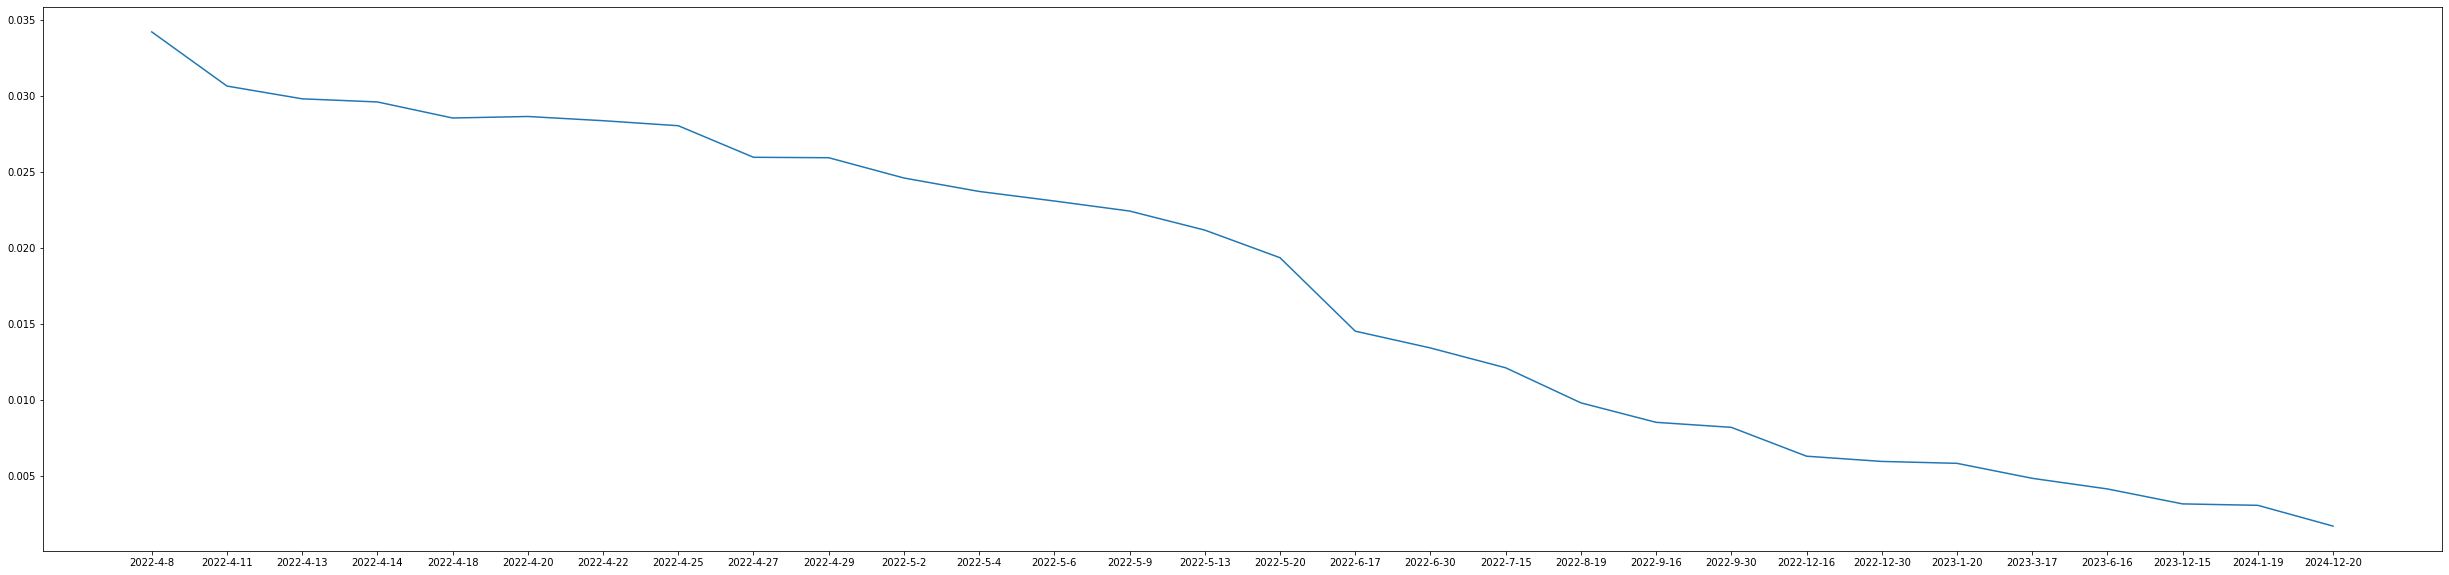

In [336]:
plot_expiration_atm('C', valid_expirations_sorted, 'gamma')

In [ ]:
def plot_strike_expiration():
    

In [6]:
# Plots (Takes)

In [3]:
# 